<a href="https://colab.research.google.com/github/mariiacd13/07-MBIG_js-5v351g/blob/master/_MC_06MBIG_AG2_DengAI_Predicting_Disease_Spread_Predicci%C3%B3n_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![texto alternativo](https://community.drivendata.org/uploads/default/original/1X/0f3a28954438c90e1935d61f3f2c23e906feb39a.jpg)

# **DengAI. Predicting Disease Spread -  Predicción**

---

Autor: Maria Cabrera Dengra

Fecha: 20/04/2020

---


# El objetivo de la práctica


El objetivo es conseguir un modelo predictivo con aprendizaje supervisado. 

Trabajaremos con **regresión, randomforest y Knn**

---
Los datos con lo que vamos a trabajar son los de la comentación del DENGE
Dengue. Mas información en [enlace](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/)

Al tratarse de un modelo prectivo supervisado, conteremos con el set de datos de train y el de test.




# 1. Carga de librerias

Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas. 

In [0]:
# carga de datos
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Carga de Datos

Procederemos a la carga de datos de los ficheros a trabajar. En la compenteción se facilitan 3 ficheros: 

1.   **Dengue_feature_train**: Datos para entrenar. Contiene las variables.- *conocido y estudiado en la AG1-*
2.   **Dengue_labels_train**: Contiene el dato de numero de casos contagiados para las variables del set anterior.
3.   **Dengue_feature_test**: Set de datos a predecir el numero de casos. 


In [0]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

En primer lugar vamos a **subir los datos de train**. Como hemos dicho, se componen de dos ficheros que debemos unir con nuestras variables categoricas. 


In [0]:
train_feat = upload_files()
train_feat.head()

Saving dengue_features_train.csv to dengue_features_train (3).csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [0]:
train_feat.shape

(1456, 24)

In [0]:
train_labels = upload_files()
train_labels.head()

Saving dengue_labels_train.csv to dengue_labels_train (3).csv
User uploaded file "dengue_labels_train.csv" with length 19582 bytes


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


Mezclamos los dos conjuntos de datos para tenerlos en un único dataframe

In [0]:
train = pd.merge(train_feat,train_labels,on=['city', 'year', 'weekofyear'])

train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Finalmente subimos los datos para generar la evaluación final (dengue_features_test)

In [0]:
test = upload_files()
test.head()

Saving dengue_features_test.csv to dengue_features_test (3).csv
User uploaded file "dengue_features_test.csv" with length 82465 bytes


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


# 3.Preproceso



En el apartado de preproceso de los datos deslosaremos las singuientes acciones que se ejecuten sobre el conjunto de los datos: 



*   Trasnformaciones
*   Detección de campos vacios (**isnull)**
*   Rellenamos datos vacíos con la logica seleccionada (** ffill** -> rellena con el valor previo)
*   Normalizaciones
*   Elimnación de variables
*   Elemento de lista
*   Binarizacion
*   Separación por ciudades ( destacado en la AG1)

Gracias  la carga de datos, se detectó rapidamente infomración redundante en el dataset, es por ello, que procedemos a **eliminar la variable "week_start_date**

In [0]:
train.drop("week_start_date", axis = 1, inplace = True)
test.drop("week_start_date", axis = 1, inplace = True)
train.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


Trataremos los valores perdidos que los hay dado que nos evitarían tener un modelo de los datos que tenemos.

In [0]:
pd.isnull(train).any()

city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_t

In [0]:
train.fillna(method='ffill', inplace=True)
pd.isnull(train).any()

city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_t

Y aplicamos lo mismo para el test

In [0]:
test.fillna(method='ffill', inplace=True)
pd.isnull(test).any()

city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_t

También tenemos que transformar nuestras variables categóricas, en este caso una única variable que es la ciudad para lo que vamos a utilizar un *binarizador* para train y para test

In [0]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
train['city_bin'] = lb.fit_transform(train['city'])
test['city_bin'] = lb.fit_transform(test['city'])
train.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_bin
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1


Ahora city lo pasaremos a index para que no suponga un problema por ser una variable categorica. 


Y separamos por ciudades

In [0]:
sj_train = train[train['city'] == 'sj']
iq_train = train[train['city'] == 'iq']

sj_test = test[test['city'] == 'sj']
iq_test = test[test['city'] == 'iq']

sj_train.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_bin
0,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1
1,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1
2,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1
3,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1
4,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1


# 4. Selección de Variables

Hay que seleccionar características, pueden ser todas, pero eso normalmente no es una buena idea, por lo que aquí dejaremos algunas seleccionadas.

## Analisis del set de datos de SAN *JUAN*

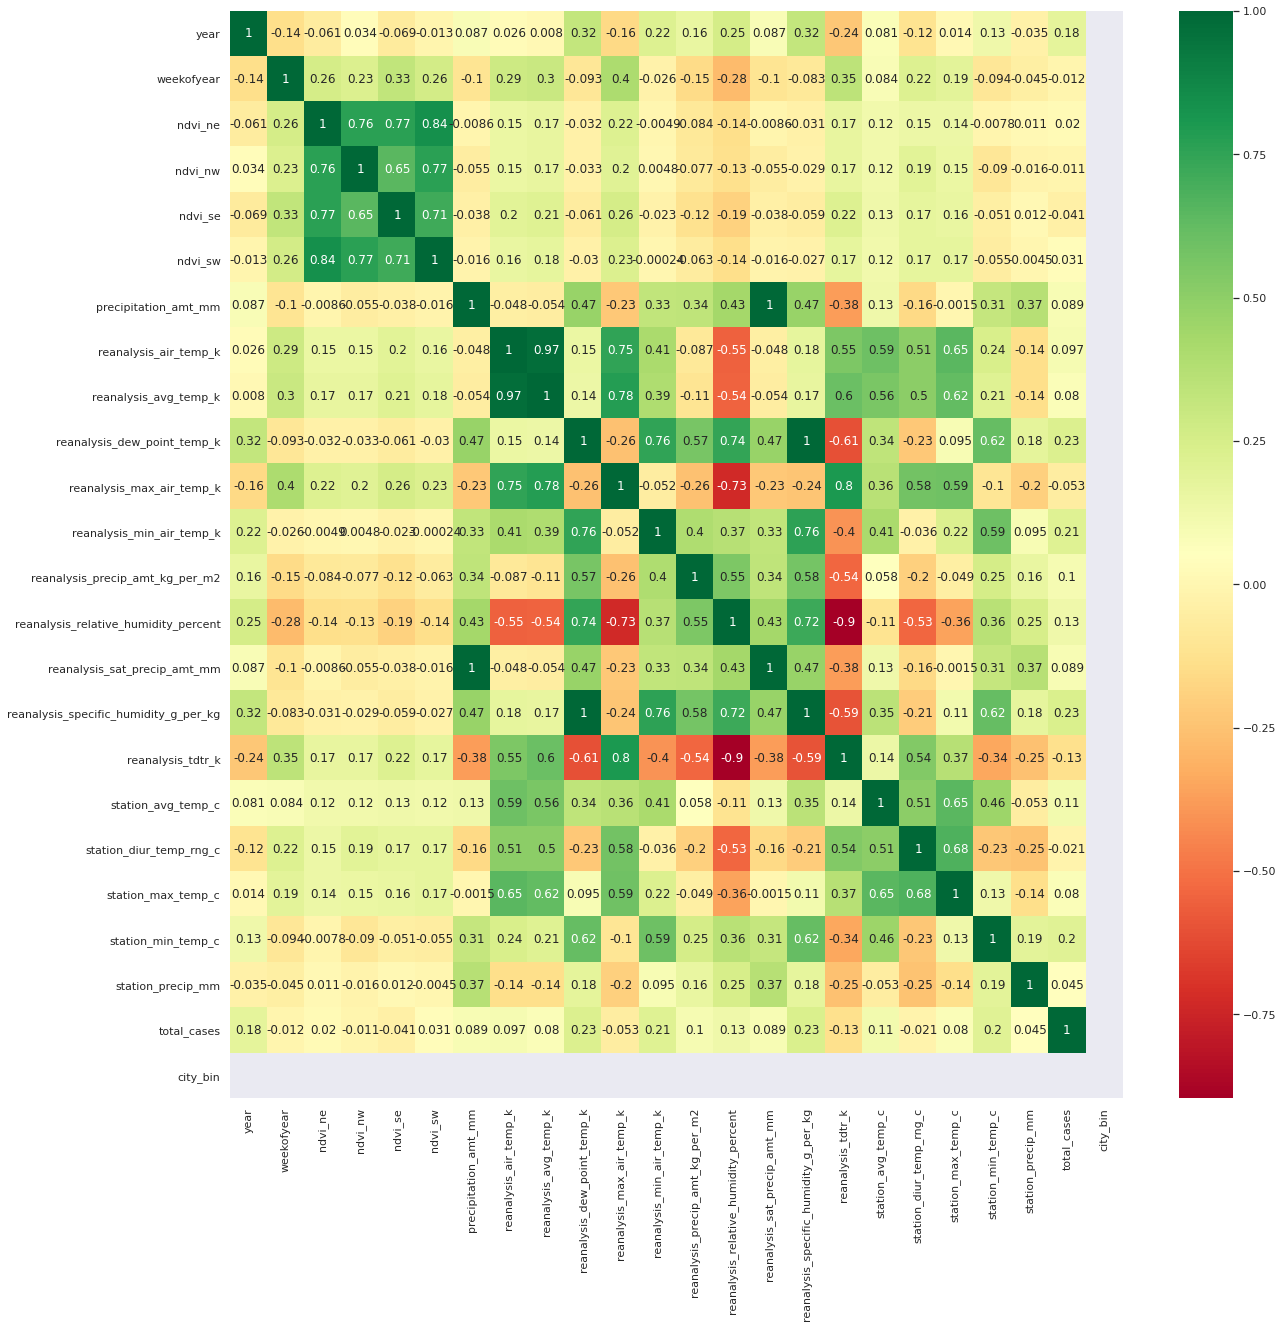

In [0]:
X = sj_train.drop(['total_cases'],axis=1)  #independent columns
y = sj_train['total_cases']    #target column i.e price range
#get correlations of each features in dataset
corrmat = iq_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(iq_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [0]:
sj_train = sj_train.set_index('city')
sj_test = sj_test.set_index('city')

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = sj_train.drop(['total_cases',],axis=1)  #independent columns
y = sj_train['total_cases']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(25,'Score'))  #print 10 best features

                                    Specs       Score
11              reanalysis_min_air_temp_k  146.626347
0                                    year  124.565251
22                               city_bin  109.516215
20                     station_min_temp_c  105.821458
7                   reanalysis_air_temp_k  104.617001
16                      reanalysis_tdtr_k   98.240035
18                station_diur_temp_rng_c   70.431114
2                                 ndvi_ne   57.885606
4                                 ndvi_se   55.871167
1                              weekofyear   53.696231
3                                 ndvi_nw   42.255682
10              reanalysis_max_air_temp_k   41.835449
8                   reanalysis_avg_temp_k   36.863273
9             reanalysis_dew_point_temp_k   31.334575
15  reanalysis_specific_humidity_g_per_kg   26.508715
5                                 ndvi_sw   23.411460
17                     station_avg_temp_c   22.169353
13   reanalysis_relative_hum

Tras analizar la correleacion de cada una de las variables con el número de casos.  Las variables seleccionadas para San Juan son las siguientes:

*  reanalysis_specific_humidity_g_per_kg
*  reanalysis_dew_point_temp_k 
*  station_avg_temp_c  
*  reanalysis_max_air_temp_k
*  station_max_temp_c
*  eanalysis_min_air_temp_k
*  reanalysis_air_temp_k
*   station_min_temp_c
*  reanalysis_avg_temp_k

Se han escogido todas con una correlación mayor del 20%


In [0]:
selected_features_sj = ['weekofyear','reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 'station_avg_temp_c', 'reanalysis_max_air_temp_k' ,'reanalysis_air_temp_k', 'station_min_temp_c' ,'reanalysis_avg_temp_k']

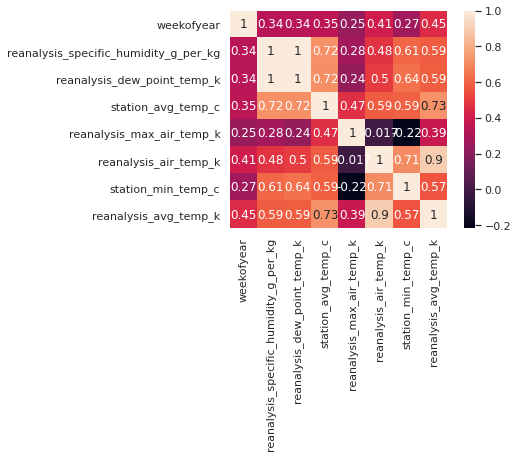

In [0]:
sns.set()
sns.heatmap(sj_train[selected_features_sj].corr(), square=True, annot=True)

## Analisis del set de datos de Iquitos

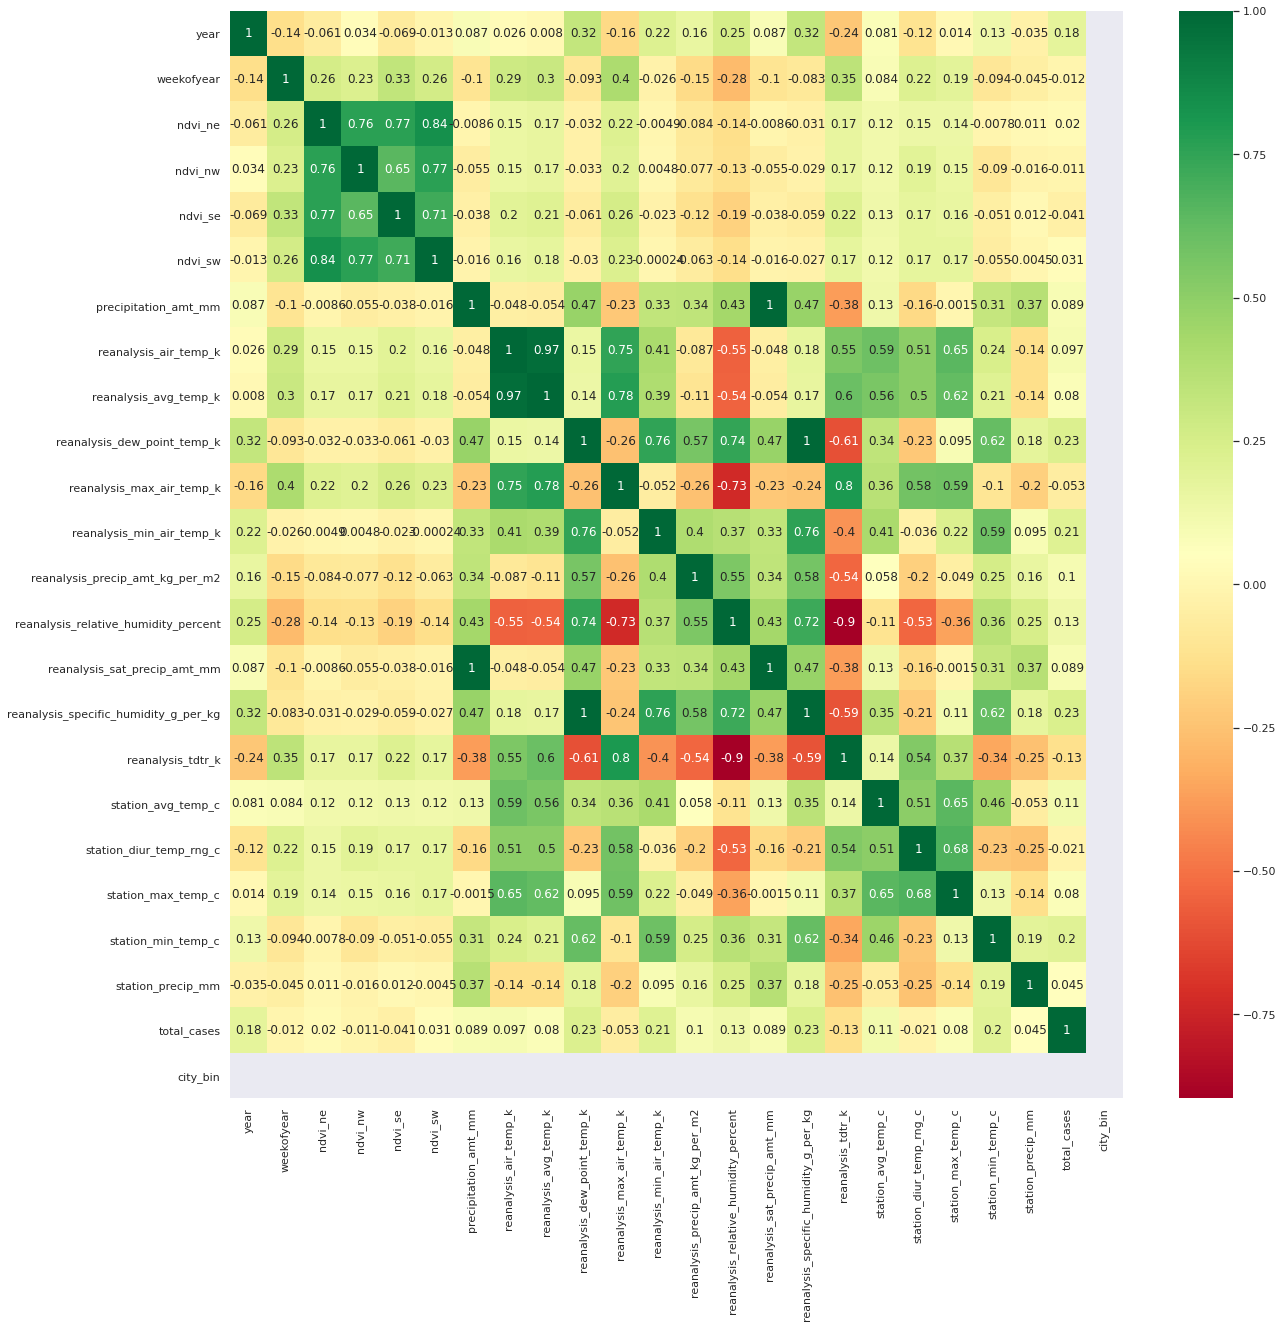

In [0]:
X = iq_train.drop(['total_cases'],axis=1)  #independent columns
y = iq_train['total_cases']    #target column i.e price range
#get correlations of each features in dataset
corrmat = iq_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(iq_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
iq_train = iq_train.set_index('city')
iq_test = iq_test.set_index('city')

KeyError: ignored

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = iq_train.drop(['total_cases',],axis=1)  #independent columns
y = iq_train['total_cases']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(25,'Score'))  #print 10 best features

                                    Specs      Score
15  reanalysis_specific_humidity_g_per_kg  30.256372
9             reanalysis_dew_point_temp_k  28.631754
11              reanalysis_min_air_temp_k  24.101522
20                     station_min_temp_c  22.227976
0                                    year  17.236049
16                      reanalysis_tdtr_k   8.979459
13   reanalysis_relative_humidity_percent   8.703499
17                     station_avg_temp_c   6.872876
12        reanalysis_precip_amt_kg_per_m2   5.305083
7                   reanalysis_air_temp_k   4.885993
6                    precipitation_amt_mm   4.174381
14           reanalysis_sat_precip_amt_mm   4.174381
8                   reanalysis_avg_temp_k   3.341239
19                     station_max_temp_c   3.331273
10              reanalysis_max_air_temp_k   1.467857
21                      station_precip_mm   1.064366
4                                 ndvi_se   0.878776
5                                 ndvi_sw   0.

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Las variables con una mayor relación con el dato a predecir son las siguientes: 



*   reanalysis_specific_humidity_g_per_kg
*   reanalysis_dew_point_temp_k  
*  reanalysis_min_air_temp_k
*  station_min_temp_c 



In [0]:
selected_features_iq = ['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k', 
                 'reanalysis_min_air_temp_k', 'station_avg_temp_c']

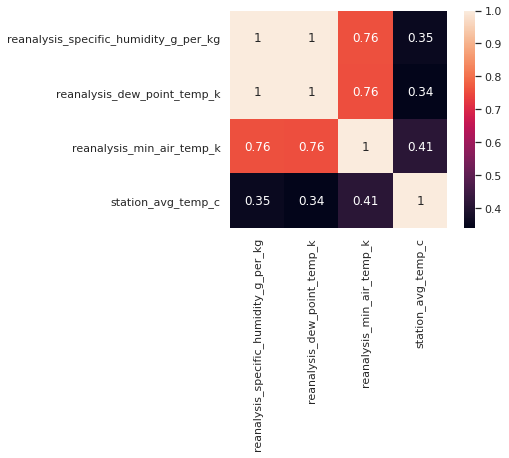

In [0]:
sns.set()
sns.heatmap(iq_train[selected_features_iq].corr(), square=True, annot=True)

Y normalizamos los set de datos. 

In [0]:
from sklearn.preprocessing import MinMaxScaler
# performin min-max scaling each continuous feature column to the range [0, 1]
scaler = MinMaxScaler()

sj_train_datanorm = scaler.fit_transform(sj_train)
iq_train_datanorm = scaler.fit_transform(iq_train)
sj_test_datanorm = scaler.fit_transform(sj_test)
iq_test_datanorm = scaler.fit_transform(iq_test)


In [0]:
sj_train_s = sj_train[selected_features_sj]
sj_test_s = sj_train[selected_features_sj]

iq_train_s = iq_train[selected_features_iq]
iq_test_s = iq_test[selected_features_iq]

In [0]:
X_sj_train = scaler.fit_transform(sj_train_s)
X_iq_train = scaler.fit_transform(iq_train_s)

In [0]:
X_sj_test = scaler.fit_transform(sj_test_s)
X_iq_test = scaler.fit_transform(iq_test_s)

In [0]:
y_sj_train = sj_train['total_cases']
y_iq_train = iq_train['total_cases']

In [0]:
sj_train_s.head()

,weekofyear,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k,station_avg_temp_c,reanalysis_max_air_temp_k,reanalysis_air_temp_k,station_min_temp_c,reanalysis_avg_temp_k
0,7,14.752857,293.342857,26.271429,299.6,297.760000,20.6,297.971429
1,8,13.827143,292.301429,25.700000,300.1,296.768571,20.6,296.871429
2,9,13.494286,291.911429,25.571429,299.7,297.014286,21.1,297.242857
3,10,12.582857,290.775714,24.900000,298.9,296.425714,19.4,296.642857
4,11,15.064286,293.692857,26.928571,300.4,297.855714,21.1,298.014286


## **Selección de variables global de SET de Datos**

In [0]:
train = train.set_index('city')
test = test.set_index('city')

In [0]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = train.drop(['total_cases',],axis=1)  #independent columns
y = train['total_cases']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(25,'Score'))  #print 10 best features

                                    Specs       Score
11              reanalysis_min_air_temp_k  172.112188
0                                    year  151.086169
22                               city_bin  136.163886
16                      reanalysis_tdtr_k  123.225159
20                     station_min_temp_c  109.565743
7                   reanalysis_air_temp_k  108.475402
18                station_diur_temp_rng_c   86.644406
1                              weekofyear   71.470474
4                                 ndvi_se   69.370081
2                                 ndvi_ne   63.853278
10              reanalysis_max_air_temp_k   56.119155
3                                 ndvi_nw   42.429758
8                   reanalysis_avg_temp_k   33.137351
5                                 ndvi_sw   31.352005
9             reanalysis_dew_point_temp_k   28.657508
13   reanalysis_relative_humidity_percent   26.919355
15  reanalysis_specific_humidity_g_per_kg   23.571335
17                     stati

Tras analizar los siguientes relaciones vamos a trabajar con las siguientes variables: 

*  reanalysis_min_air_temp_k 
*  year  
*  city_bin  
*  reanalysis_tdtr_k  
*  station_min_temp_c
*  reanalysis_air_temp_k  
*  station_diur_temp_rng_c   
*  weekofyear  
*  ndvi_se  
*  ndvi_ne   
*  reanalysis_max_air_temp_k   

In [0]:
selected_features = ['reanalysis_min_air_temp_k', 
                 'year', 'city_bin','reanalysis_tdtr_k', 'station_min_temp_c', 'reanalysis_air_temp_k', 'station_diur_temp_rng_c','weekofyear', 'ndvi_se', 'ndvi_ne', 'reanalysis_max_air_temp_k' ]

Al tener la variable de ciudad binarizada, se tendrá en cuenta en todo el entrenamiento sin tener que trabajar con set de datos diferenciados. Es por ello, que vamos a realizar el estudio con esta ultima selección. 

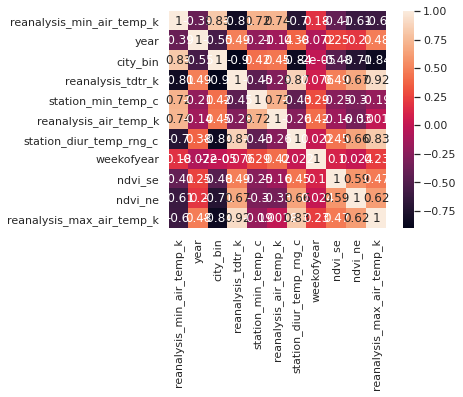

In [0]:
sns.set()
sns.heatmap(train[selected_features].corr(), square=True, annot=True)

In [0]:
from sklearn.preprocessing import MinMaxScaler
# performin min-max scaling each continuous feature column to the range [0, 1]
scaler = MinMaxScaler()
train_datanorm = scaler.fit_transform(train)
test_datanorm = scaler.fit_transform(test)
X_train = scaler.fit_transform(train[selected_features])
X_test = scaler.transform(test[selected_features])
y_train = train['total_cases']


# 4. Modelo KNN

El modelo KNN es el algoritmo de los vecinos mas cercanos, es un claro aprendizaje basado en instancias. 

## 1. Parametrización

Existen diferentes parámetros para método basado en los vecinos más cercanos utilizando **scikit-learn**

*   **KNeighbors/Radius**: KNeihgbors está basado en el estudio de los k vecinos más cercanos para cada punto, mientras que RadiusNeighboors están basados en un conjunto de vecinos que están dentro de un radio. **Nuestra elección es la primera**, la segunda sería útil cuando los datos no estuvieran muestreados de forma uniforme.
* **K/Radio**
    * **k**: Un número k mayor suprime el eecto del ruido pero hace a los límites de clasificación más distintos.
    * **Radios**, un radio fijo es muy adecuado cuando los datos están muy dispersos (sprarse neighboors
*   **Pesos** : dos posibles valores, "uniform" cada vecino tiene el mismo peso, weights se asigna un peso a cada vecino proporcional a la distancia que esté del elemento referencia. También se puede definir una dfunción por parte del usuario

Nuestra elección KNeighbors y k y pesos se van a parametrizar para ello se ejecutará **validación cruzada** y como medida de éxito vamos a utilizar **MAE**


Sobre el codigo se explican las principales parametrizaciones empleadas: 


In [0]:
# reseteamos el index con el fin de evitar problemas en la validación cruzada
train.reset_index(drop = True, inplace = True)
train.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_bin
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1


In [0]:
train = train.set_index('city')
test = test.set_index('city')

Min Value uniform : 21.697272727272725 (11)
Min Value distance : 21.536639945099342 (17)


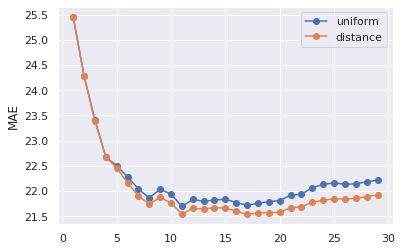

In [0]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits = 10, shuffle = False) #El numero de corte se ha probado con 10. 

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30): #EL rango nos indica el numero de valores, si aumentamos el valor veriamso como se densifica los  puntos sobre la linea en la gráfica
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          f_train = train.loc[train_fold]
          f_test = train.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['total_cases'], axis=1), 
                               y = f_train['total_cases'])
          yy_pred = knn.predict(X = f_test.drop(['total_cases'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['total_cases'], yy_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 



**¿Que decisiones podemos tomar de este grafico?**

Vemos que las tendencias de unifrme y distancia son similares, siendo algo peor el uniform. 

Por lo tanto, escogeremos el metodo distancia ( **peso= distancia**) con el valor K que nos indica (**k=17**)


Es necesario crear la columna total_cases en el dataset de TEST para la predicción. Por tanto la crearemos y le daremos el valor 0. 

In [0]:
test["total_cases"] = 0
test

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_bin,total_cases
city,,,,,,,,,,,,,,,,,,,,,,,,
sj,2008,18,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,1,0
sj,2008,19,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,1,0
sj,2008,20,-0.001500,-0.012400,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,1,0
sj,2008,21,-0.001500,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,1,0
sj,2008,22,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iq,2013,22,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0,0,0
iq,2013,23,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0,0,0
iq,2013,24,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2,0,0


## Construcción y evaluación preliminar del modelo

Siempre revisamos el fichero a analizar, para asegurarnos que no tenemos variables categoricas. 

In [0]:
# constructor
n_neighbors = 17
weights = 'distance'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
# fit and predict
knn.fit( X = train.drop(['total_cases'], axis=1), y = train['total_cases'])
y_pred = knn.predict(X = test.drop(['total_cases'], axis = 1))


# evaluación del modelo       
mae = mean_absolute_error(test['total_cases'], y_pred)

        
print ('MAE', mae)

MAE 19.420876204844586


FIT --> knn parametrizar contruir y entrenar con nuestros datos, y salida. pREDICT-> Ejecuta los datos de test. y calcula el mae. 

In [0]:
import numpy as np
res = np.rint(y_pred) # Geberanos nuestros datos
res = res.astype(int) # Lo tenemos que rendodear a numero enteros para la competición. 
res


array([21, 11,  9,  7, 18, 35,  5, 19, 10, 19, 22, 17, 15, 31, 50, 23, 61,
       50, 28, 40, 23, 20, 47, 50, 27, 43, 25, 59, 41, 88, 55, 25, 17, 54,
       33, 13, 15,  9, 12, 18, 10, 21, 11,  9, 14, 12, 13, 12,  7,  6,  7,
        6, 11,  8, 14, 20, 22,  9, 11,  4, 11, 26, 19, 22, 15, 45, 26, 12,
       16, 41, 37, 44, 20, 21, 26, 47, 48, 30, 54, 24, 13, 27, 24, 22, 17,
       24, 28, 28, 18, 23, 10, 17,  9, 11, 11, 13, 14, 17, 14, 10,  8, 11,
        6, 17, 13,  9, 14, 22, 26, 24, 19, 16, 24, 17, 21, 44, 27, 22, 29,
       25, 23, 49, 33, 21, 26, 49, 53, 40, 13, 25, 20, 57, 26, 50, 22, 29,
       24, 29, 12, 22, 13, 18, 11, 15, 14,  9, 12, 14, 10, 10,  8,  7, 10,
        8,  7,  9,  7,  9, 10,  9,  7, 16, 30,  7, 18, 40, 34, 26,  4, 11,
       16, 33, 25, 20, 20, 33, 27, 49, 17, 22, 13, 46, 48, 26, 45, 24, 41,
       47, 22, 22, 23, 44, 15, 11, 14, 17, 19, 15,  9, 12,  9,  9,  9, 13,
       25, 12,  9, 13,  8,  6, 16, 18, 14, 10, 12, 11, 22, 13, 22, 12, 36,
       21, 35, 20, 18, 34

**Tenemos que deshacer el INDEX de TEST para poder crear el fichero csv**

In [0]:
test.reset_index(level=0, inplace=True)
test

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_bin,total_cases
0,sj,2008,18,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,1,0
1,sj,2008,19,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,1,0
2,sj,2008,20,-0.001500,-0.012400,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,1,0
3,sj,2008,21,-0.001500,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,1,0
4,sj,2008,22,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0,0,0
412,iq,2013,23,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0,0,0
413,iq,2013,24,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2,0,0
414,iq,2013,25,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1,0,0


## Generar resultados

In [0]:
# generate output


output = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 
                       'total_cases': res})


from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

output.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,21
1,sj,2008,19,11
2,sj,2008,20,9
3,sj,2008,21,7
4,sj,2008,22,18


**¿Como se comporta nuestro algoritmo?**

Hemos dibujado el set de datos del entrenamiento realizado. Se escogen los datos del test tras la particion del train aleatorio.  Vemos que aun teenemos algunas zonas de mejora. Esto es solo orientativo ya que los datos de modelo se trabajand con el TEST. 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


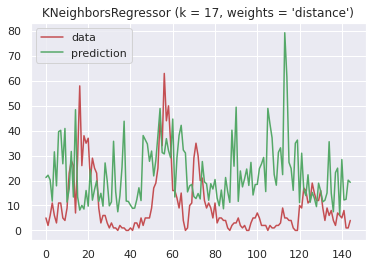

In [0]:

from sklearn.metrics import mean_absolute_error
import numpy as np

xx = np.stack(i for i in range(f_test['total_cases'].shape[0]))
plt.plot(xx, f_test['total_cases'], c='r', label='data')
plt.plot(xx, yy_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

# 5.Modelo Regresión


Una vez que hemos identificado la mejor parametrización vamos a pasar a hacer una ejecución del modelo y vamos graficar sus resultados.

El modelo que se va a emplear en primer momento es una **regresion lineal** 

Antes de iniciar, devolveremos en el dataSET de test la columna city a indice. 

In [0]:
test = test.set_index('city')
test

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_bin,total_cases
city,,,,,,,,,,,,,,,,,,,,,,,,
sj,2008,18,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,1,0
sj,2008,19,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,1,0
sj,2008,20,-0.001500,-0.012400,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,1,0
sj,2008,21,-0.001500,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,1,0
sj,2008,22,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iq,2013,22,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0,0,0
iq,2013,23,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0,0,0
iq,2013,24,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2,0,0


La regresión lineal la vamos a trabaja con el conjunto de datos X_train, es el set de datos normalizamos y escogiendo las variables decididas por el experto de datos. 

In [0]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(X_test)

Generamos el dato y lo pasamos a entero para la competición. 

In [0]:
import numpy as np
y = np.rint(y_pred) # round
y = y.astype(int) # cast to int
res = np.hstack(y)

res

array([ 13,  17,  12,  16,  23,  21,  23,  23,  29,  27,  19,  23,  18,
        30,  27,  38,  24,  28,  28,  30,  24,  23,  27,  30,  31,  19,
        38,  34,  26,  27,  29,  27,  20,  19,  23,  -4, -12,   0,   2,
        -3,   3,  -6,  -2, -10,  -3,   6,  -8,  -7,   1,   0,   7,   9,
         8,  15,  14,  13,  11,  18,  21,  22,  19,  16,  24,  21,  23,
        29,  22,  30,  25,  23,  30,  33,  33,  30,  33,  31,  25,  27,
        27,  32,  28,  32,  26,  27,  31,  25,  30,  28,  -4,  -2,   1,
        -3,   4,  -9,  -2,   9,   2,  15,   2,   3,   0,   4,   6,  10,
        20,  12,  16,  14,  15,  25,  21,  11,  22,  20,  20,  23,  28,
        24,  19,  34,  27,  22,  28,  31,  26,  27,  30,  29,  31,  14,
        20,  32,  32,  26,  20,  26,   8,  19,  24,  21,  -4,  -1, -11,
        -9,  -6,  -2,  -8,  -9,  -4, -13,  -7,  -7,   0,   2,   1,  -3,
         4,  10,   8,  11,  16,  18,  23,  20,  17,  24,  23,  17,  25,
        23,  22,  21,  21,  28,  21,  24,  26,  30,  17,  16,  3

Y volvemos a deshacer el inidice de TEST para generar el fichero CSV

In [0]:
test.reset_index(level=0, inplace=True)
test

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_bin,total_cases
0,sj,2008,18,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,1,0
1,sj,2008,19,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,1,0
2,sj,2008,20,-0.001500,-0.012400,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,1,0
3,sj,2008,21,-0.001500,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,1,0
4,sj,2008,22,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0,0,0
412,iq,2013,23,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0,0,0
413,iq,2013,24,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2,0,0
414,iq,2013,25,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1,0,0


In [0]:
# generate output
output = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 
                       'total_cases': res})


from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

output.head()


,city,year,weekofyear,total_cases
0,sj,2008,18,13
1,sj,2008,19,17
2,sj,2008,20,12
3,sj,2008,21,16
4,sj,2008,22,23


# 6. Modelo RandomForest

Emplearemos el modelo RandomForest, es un árbol de decisión, que describe en función de un conjunto de atributos, permite determinar a qué clase pertenece o qué valor adquiere el caso objeto de estudio.

 En cada nodo de decisión se especifica una prueba o test a realizar y los posibles resultados de la prueba en cuestión son los descendientes del nodo. Puede haber más de un árbol de decisión correcto para un mismo conjunto de datos dependiendo del orden en el que se van eligiendo los atributos.

 

In [0]:
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit() #

No handles with labels found to put in legend.


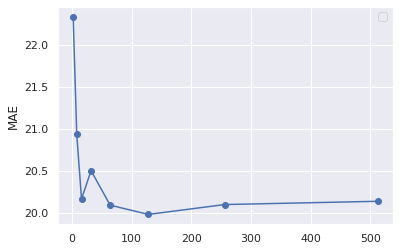

In [0]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np



cv = KFold(n_splits = 5, shuffle = False) # 

l_estimators = [2, 8, 16, 32, 64, 128, 256, 512]

total_scores = []
for estimators in l_estimators:
    fold_accuracy = []
    regressor =  RandomForestRegressor(n_estimators= estimators, 
                  criterion='mae', random_state=0)
    for train_fold, test_fold in cv.split(X_train):
        # División train test aleatoria
 
        f_train = train.iloc[train_fold]
        f_test =  train.iloc[test_fold]
        # entrenamiento y ejecución del modelo
        regressor.fit( X = f_train.drop(['total_cases'], axis=1), y = f_train['total_cases'])
        y_pred = regressor.predict(X = f_test.drop(['total_cases'], axis = 1))
        # evaluación del modelo
        mae = mean_absolute_error(f_test['total_cases'], y_pred)
        fold_accuracy.append(mae)
    total_scores.append(sum(fold_accuracy)/len(fold_accuracy))


plt.plot(l_estimators, total_scores, marker='o')
plt.ylabel('MAE')      
    

plt.legend()
plt.show() 


In [0]:
best_est = l_estimators[np.argmin(total_scores)]
best_mae = min(total_scores)
print ("Min Value (estimators = %i, MAE = %6.2f)"  % (best_est, best_mae))

Min Value (estimators = 128, MAE =  19.98)


## Contruimos el modelo


In [0]:
test["total_cases"] = 0
test

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_bin,total_cases
0,sj,2008,18,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,1,0
1,sj,2008,19,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,1,0
2,sj,2008,20,-0.001500,-0.012400,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,1,0
3,sj,2008,21,-0.001500,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,1,0
4,sj,2008,22,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0,0,0
412,iq,2013,23,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0,0,0
413,iq,2013,24,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2,0,0
414,iq,2013,25,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1,0,0


In [0]:
test = test.set_index('city')

In [0]:
# constructor
regressor =  RandomForestRegressor(n_estimators= best_est, criterion='mae', 
                                   random_state=0)
# fit and predict

regressor.fit( X = X_train.drop(['total_cases'], axis=1), y = X_train['total_cases'])
y_pred = regressor.predict(X = Y_test.drop(['total_cases'], axis = 1))

In [0]:
mae = mean_absolute_error(test['total_cases'], y_pred) 
print ('MAE', mae)

MAE 20.662992037259617


## Guardamos los datos y visualizamos los resultados

In [0]:
test.reset_index(level=0, inplace=True)
test

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_bin,total_cases
0,sj,2008,18,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,1,0
1,sj,2008,19,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,1,0
2,sj,2008,20,-0.001500,-0.012400,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,1,0
3,sj,2008,21,-0.001500,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,1,0
4,sj,2008,22,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,298.964286,295.638571,305.5,292.7,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0,0,0
412,iq,2013,23,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,298.328571,295.845714,306.3,291.6,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0,0,0
413,iq,2013,24,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,296.607143,294.894286,304.6,290.7,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2,0,0
414,iq,2013,25,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,297.400000,293.648571,305.9,292.5,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1,0,0


In [0]:
# generate output
output = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 
                       'total_cases': res})


from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

output.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,13
1,sj,2008,19,17
2,sj,2008,20,12
3,sj,2008,21,16
4,sj,2008,22,23
